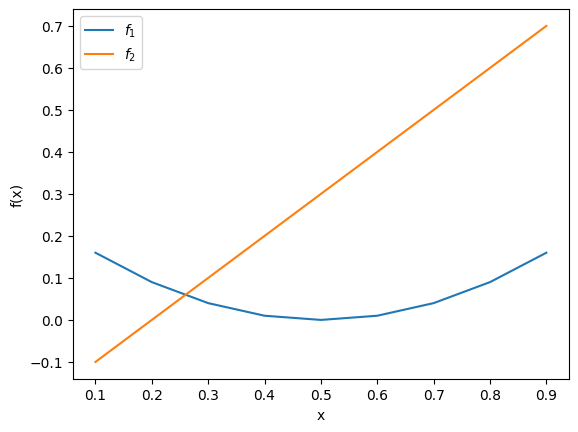

In [1]:
from blackboxopt.optimize import find_pareto_front
from blackboxopt.acquisition import pareto_front_target
import numpy as np
import matplotlib.pyplot as plt

dim = 1
objdim = 2
def f(x):
    return [[(.5-_x)**2, _x-.2] for _x in x]

samples = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
fsamples = np.array(f(samples))
plt.plot(samples, fsamples[:,0], label=r"$f_1$")
plt.plot(samples, fsamples[:,1], label=r"$f_2$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

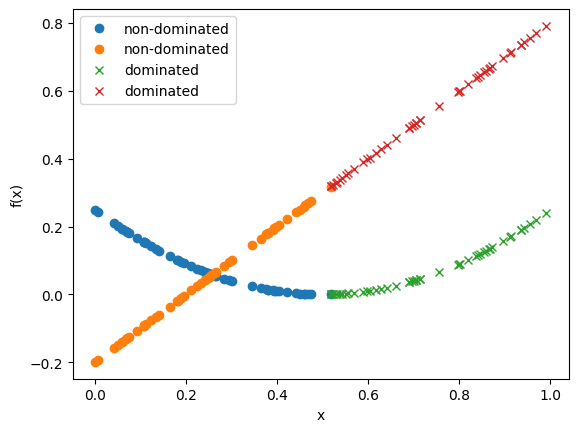

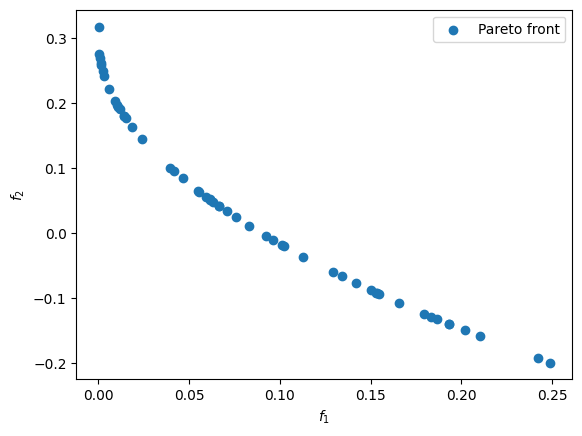

In [2]:
samples = np.random.rand(100)
fsamples = np.asarray(f(samples))
pareto_idx = find_pareto_front(samples, fsamples)
non_pareto_idx = np.setdiff1d(np.arange(len(samples)), pareto_idx)

plt.plot(samples[pareto_idx], fsamples[pareto_idx,0], 'o', label="non-dominated")
plt.plot(samples[pareto_idx], fsamples[pareto_idx,1], 'o', label="non-dominated")
plt.plot(samples[non_pareto_idx], fsamples[non_pareto_idx,0], 'x', label="dominated")
plt.plot(samples[non_pareto_idx], fsamples[non_pareto_idx,1], 'x', label="dominated")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

plt.scatter(fsamples[pareto_idx,0], fsamples[pareto_idx,1], label="Pareto front")
plt.xlabel(r"$f_1$")
plt.ylabel(r"$f_2$")
plt.legend()
plt.show()

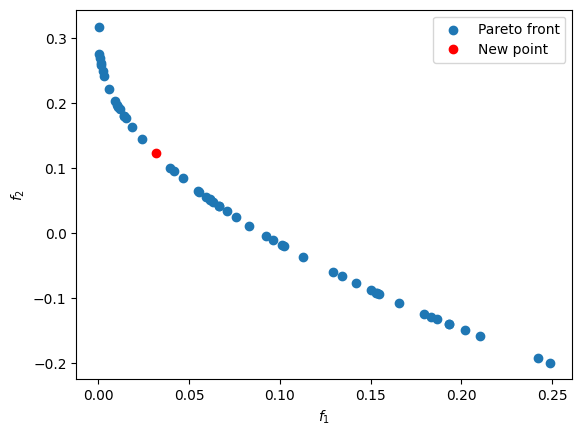

In [3]:
paretoFront = fsamples[pareto_idx,:]
tau = pareto_front_target(paretoFront)

# Plot the Pareto front and the new point tau
plt.scatter(paretoFront[:, 0], paretoFront[:, 1], label="Pareto front")
plt.plot([tau[0]], [tau[1]], 'ro', label="New point")
plt.xlabel(r"$f_1$")
plt.ylabel(r"$f_2$")
plt.legend()
plt.show()

In [4]:
# np.append(paretoFront, [tau], axis=0)
# f0New = tau[0]
# pareto_idx = find_pareto_front(samples, fsamples)
# non_pareto_idx = np.setdiff1d(np.arange(len(samples)), pareto_idx)


# plt.scatter(fsamples[pareto_idx,0], fsamples[pareto_idx,1], label="Pareto front with added point")
# plt.xlabel(r"$f_1$")
# plt.ylabel(r"$f_2$")
# plt.legend()
# plt.show()